<a href="https://colab.research.google.com/github/hhnnhh/berlin_datascience_lab/blob/master/baseline/vanilla_baseline_4_static_car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# baseline model
Establishing a baseline model with static car features. 
Features are chosen in terms of technological background knowledge:

*  MODEL AGE (= TEST-DATE - MODELYEAR)
*  ODOMETER
*  VEHICLE_TYPE
*  FUEL_TYPE


Exploration of four different machine learning algorithms:
1. Naive Bayes
2. Logistic Regression
3. Support Vector Machine
4. Random Forest 

Algorithms perform extremly bad with features: 'AGE', 'ODOMETER', 'GVWTYPE_IMP', 'FUEL_TYPE'.

ROC SCORE: 0.5 

**To do next:**! 
* ! continuous features are not scaled, categorical features not dummy transformed
* ! hyperparameters set to default, no tuning



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data frame

In [ ]:
#isabelles data path:
data_path = '/content/drive/My Drive/Colab Notebooks/cars_files/'

In [ ]:
#isabelles data load
df = pd.read_csv(data_path + 'copy_sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')
str_df = pd.read_csv(data_path + 'copy_sample.csv', dtype=str, parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,18,26,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#hannahs data path:
data_path = '/content/drive/My Drive/WIMLDS/'

In [ ]:
#hannahs data load
df = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')
str_df = pd.read_csv(data_path + 'sample.csv', dtype=str, parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')

FileNotFoundError: ignored

# Exploration

In [ ]:
len(df.columns)

127

In [ ]:
df.columns

Index(['RecordID', 'RECORD_NUM', 'VIR_CERT_NUMBER', 'STATION_NUM',
       'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_TYPE', 'VID_TEST_TYPE',
       'TEST_SDATE', 'TEST_EDATE',
       ...
       'E_IDLE_HC_RESULT', 'MECHANIC_LAST_NAME', 'MECHANIC_FIRST_NAME',
       'MECHANIC_MIDDLE_INIT', 'ENGINE_SIZE_ORIG', 'FAILED_IDLE_RPM',
       'SENTTOVID', 'Station_License_Number', 'Analyzer_Number',
       'Insert_DateTime\r'],
      dtype='object', length=127)

In [ ]:
df.head()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,1FTCR10A8RUE42421,S,NPE42421,1.0,4222,1994,FORD,RANGER REG. CAB - SHO,4,2300,M,N,53274,G,3,16.97,87107,F,11.0,948055,1,1,1.21,2676,12.7,3.57,18,22,180,0.0,0.0,1.2,1.23,809.0,12.4,3.8,26.0,32.0,180.0,0.03,0.04,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,141.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,1G1JC5249Y7453635,S,CKK700,1.0,2875,2000,CHEVROLET,CAVALIER,4,2200,A,N,109225,G,1,19.95,87114,F,6.0,0,1,1,0.00,0,0.0,0.00,0,0,100,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,P,N,N,N,N,P,P,1.0,1.0,4.0,1.0,0.0,5.0,0.0,3.0,4.0,1.0,0.0,P,6.0,NaN,NaN,NaN,P,1.0,P,1.0,0.0,NaN,140.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,N,N,N,N,N,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r
2,298121,185,NaN,IR354,W109,32641547,I,NaN,2004-08-31 13:03:00,2004-08-31 13:03:00,KNJBT06K2K6116760,M,NP116760,1.0,2000,1989,FORD,FESTIVA,4,1300,M,N,110347,G,1,NaN,87108,F,4.0,890199,1,1,1.47,2480,10.4,6.73,20,29,200,0.0,0.0,1.2,0.00,690.0,0.0,0.0,0.0,0.0,200.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,P,P,N,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,99.0,140.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,Anderson,Phillip,L,NaN,T,0.0,IR354,W109,2006-01-24 09:07:03\r
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,1JCNJ15U6FT075960,M,469FNH,2.0,6200,1985,JEEP,GRAND WAGONEER,8,5900,A,N,152121,G,4,18.81,87103,F,15.0,850119,1,1,1.13,2495,13.6,2.32,12,14,300,0.0,0.0,3.0,1.24,911.0,12.4,4.1,12.0,15.0,300.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,141.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,2006-01-26 17:03:05\r
4,384955,1326,4492


# Selection
*preparation for selecting the variables for the basic-model data frame*

What's the meaning of the three different 'date' columns? I don't understand the 'Insert_DateTime\r' columns - is it true that the data for some of the rows has been inserted into the data frame two years later? I'll be using the **Test-SDate** for calculating the age of the car. (Could have been using EDate as well.) Will not be keeping "Insert_DateTime\r" in the new basic-model df.

In [ ]:
df[['Insert_DateTime\r','TEST_SDATE','TEST_EDATE']]


,Insert_DateTime\r,TEST_SDATE,TEST_EDATE
0,2006-01-12 21:19:17\r,2004-12-16 10:57:00,2004-12-16 11:03:00
1,2006-01-13 17:43:30\r,2004-08-13 14:10:00,2004-08-13 14:12:00
2,2006-01-24 09:07:03\r,2004-08-31 13:03:00,2004-08-31 13:03:00
3,2006-01-26 17:03:05\r,2004-12-02 11:33:00,2004-12-02 11:39:00
4,2006-01-31 16:06:03\r,2004-12-29 17:00:00,2004-12-29 17:03:00
...,...,...,...
235172,2014-08-28 10:44:21\r,2014-08-28 11:41:00,2014-08-28 11:43:00
235173,2014-10-27 14:22:29\r,2014-10-27 15:17:00,2014-10-27 15:21:00
235174,2014-04-07 14:21:20\r,2014-04-07 12:13:00,2014-04-07 12:14:00
235175,2014-11-03 17:08:53\r,2014-11-03 16:57:00,2014-11-03 17:06:00


In [ ]:
#looking into some of the columns:
df[['ODOMETER','OVERALL_RESULT','MODEL_YEAR']]

,ODOMETER,OVERALL_RESULT,MODEL_YEAR
0,53274,P,1994
1,109225,P,2000
2,110347,A,1989
3,152121,P,1985
4,135640,P,1997
...,...,...,...
235172,191303,P,1999
235173,37783,P,2006
235174,40895,P,2011
235175,136544,P,1995


# Slicing

Chosing a subset. "RecordID" and "RECORD_NUM" and "TEST_TYPE" are preserved to be able to group data if necessary. 

In [ ]:
#mi_df = df[['RecordID', 'RECORD_NUM', 'VIN', 'TEST_TYPE','ODOMETER','MODEL_YEAR','TEST_SDATE', 'TEST_EDATE','VEHICLE_TYPE','FUEL_TYPE','GVW_TYPE','OVERALL_RESULT']]
#mi_str_df = str_df[['RecordID', 'RECORD_NUM', 'VIN', 'TEST_TYPE','ODOMETER','MODEL_YEAR','TEST_SDATE', 'TEST_EDATE','VEHICLE_TYPE','FUEL_TYPE','GVW_TYPE','OVERALL_RESULT']]


#Preprocessing
*Transform, clean and prepare variables for model use*

### MODEL_YEAR: calculating AGE of the car

In [ ]:
import datetime

In [ ]:
df[['MODEL_YEAR']].describe()

,MODEL_YEAR
count,235177.000000
mean,1985.219507
std,173.083298
min,0.000000
25%,1996.000000
50%,2001.000000
75%,2005.000000
max,2015.000000


In [ ]:
df[['TEST_SDATE']].describe()

,TEST_SDATE
count,235177
unique,216776
top,2006-06-16 12:19:00
freq,5
first,2004-05-03 16:13:00
last,2014-12-31 15:03:00


In [ ]:
#extracting the year from the complete "TEST_SDATE"
df['TEST_YEAR'] = df.TEST_SDATE.dt.to_period('Y')

# @Isabelle: I get a warning here. Do you know if this a problem and how I could solve it?
# "A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#calculating the age of the car by subtrating the year of the test ("TEST_YEAR") by the "MODEL_YEAR"
df['AGE'] = df['TEST_YEAR'] - df['MODEL_YEAR']# / np.timedelta64(1, 'Y')

In [ ]:
df.iloc[1].AGE.year

4

In [ ]:
#age seems fine, but its not an integer
df['AGE'] = df.AGE.apply(lambda x: x.year)

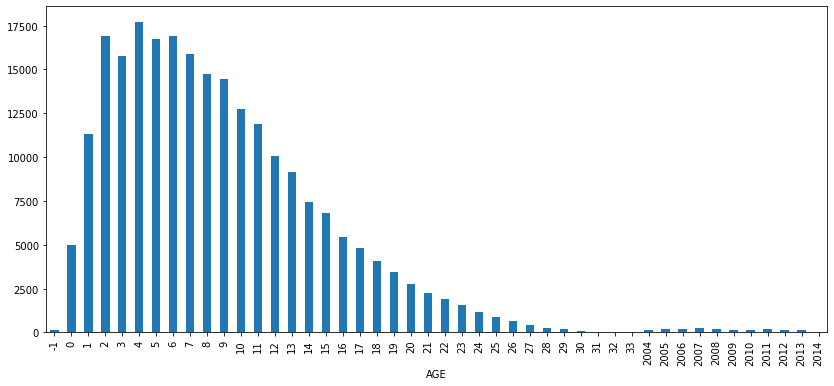

In [ ]:
#we have some strange values: -1, and 2004 ff. - might need to be changed, but by now Nan
#mi_df['AGE'].value_counts().plot.bar()#hist()
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('AGE').size().plot.bar()

Basic-Model Dataframe with **AGE** of the car in years. 

In [ ]:
df.head()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,TEST_YEAR,AGE
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,1FTCR10A8RUE42421,S,NPE42421,1.0,4222,1994,FORD,RANGER REG. CAB - SHO,4,2300,M,N,53274,G,3,16.97,87107,F,11.0,948055,1,1,1.21,2676,12.7,3.57,18,22,180,0.0,0.0,1.2,1.23,809.0,12.4,3.8,26.0,32.0,180.0,0.03,0.04,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,141.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r,2004,10
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,1G1JC5249Y7453635,S,CKK700,1.0,2875,2000,CHEVROLET,CAVALIER,4,2200,A,N,109225,G,1,19.95,87114,F,6.0,0,1,1,0.00,0,0.0,0.00,0,0,100,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,P,N,N,N,N,P,P,1.0,1.0,4.0,1.0,0.0,5.0,0.0,3.0,4.0,1.0,0.0,P,6.0,NaN,NaN,NaN,P,1.0,P,1.0,0.0,NaN,140.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,N,N,N,N,N,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r,2004,4
2,298121,185,NaN,IR354,W109,32641547,I,NaN,2004-08-31 13:03:00,2004-08-31 13:03:00,KNJBT06K2K6116760,M,NP116760,1.0,2000,1989,FORD,FESTIVA,4,1300,M,N,110347,G,1,NaN,87108,F,4.0,890199,1,1,1.47,2480,10.4,6.73,20,29,200,0.0,0.0,1.2,0.00,690.0,0.0,0.0,0.0,0.0,200.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,P,P,N,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,99.0,140.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,Anderson,Phillip,L,NaN,T,0.0,IR354,W109,2006-01-24 09:07:03\r,2004,15
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,1JCNJ15U6FT075960,M,469FNH,2.0,6200,1985,JEEP,GRAND WAGONEER,8,5900,A,N,152121,G,4,18.81,87103,F,15.0,850119,1,1,1.13,2495,13.6,2.32,12,14,300,0.0,0.0,3.0,1.24,911.0,12.4,4.1,12.0,15.0,300.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,141.0,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,P,P,P,P,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,200

### exploring the ODOMETER variable

In [ ]:
df[['ODOMETER']]

,ODOMETER
0,53274
1,109225
2,110347
3,152121
4,135640
...,...
235172,191303
235173,37783
235174,40895
235175,136544


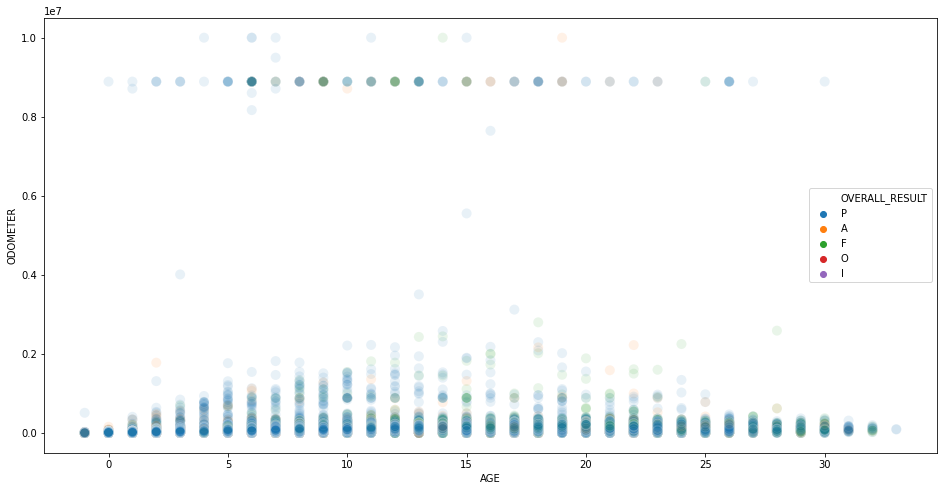

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df[df.AGE < 2000], x='AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

In [ ]:
df['ODOMETER'] = df.ODOMETER.replace(0,np.nan)
len(df[df.ODOMETER.isna()]), len(df[df.ODOMETER == 0])

(2330, 0)

In [ ]:
df.ODOMETER.fillna(0, inplace=True)

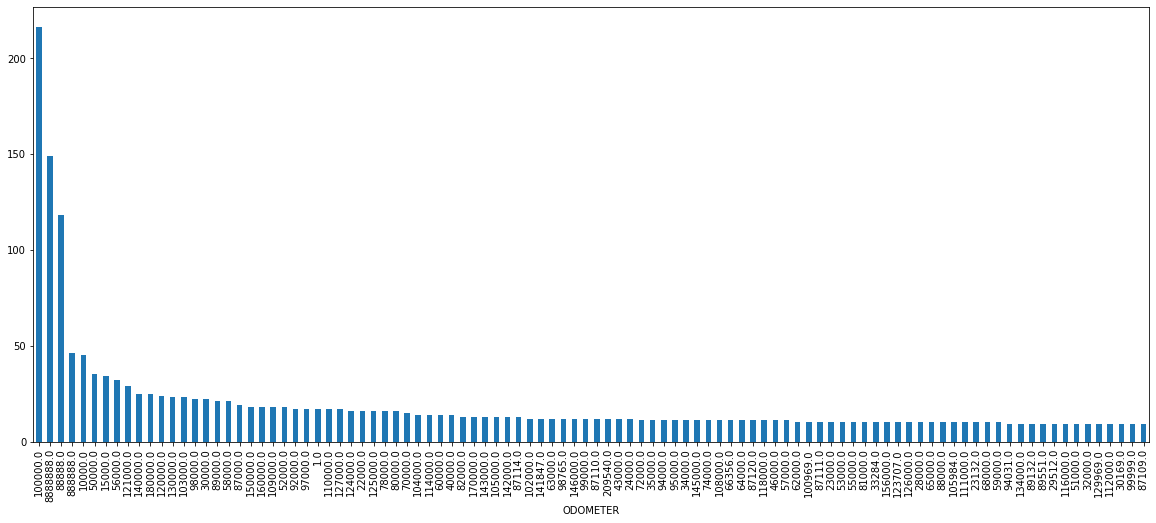

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df.groupby('ODOMETER').size().sort_values(ascending=False).head(100).plot.bar()

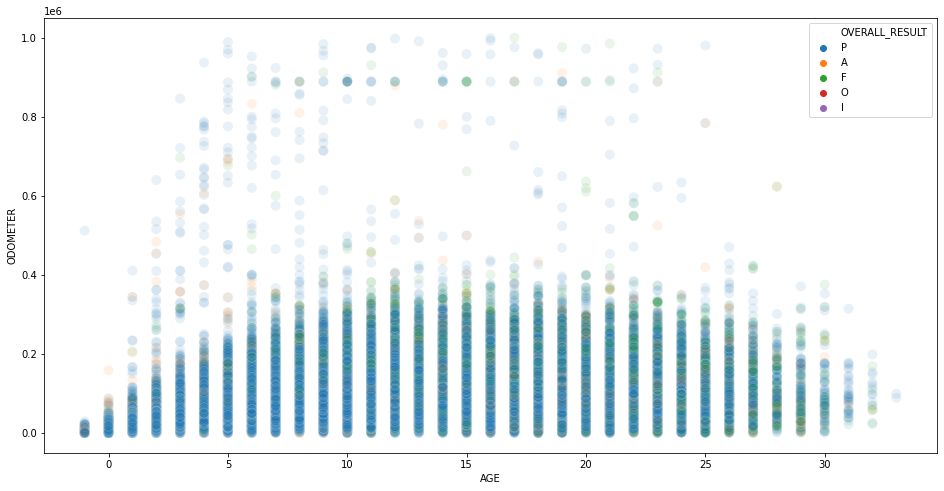

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df[(df.ODOMETER < 1000000) & (df.AGE < 2000)], x='AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

In [ ]:
df.sample()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,TEST_YEAR,AGE
139161,1834719,3676,6114403.0,IR304,W099,AC083637,I,I,2010-07-23 09:46:00,2010-07-23 09:51:00,JT3FJ60GXF1128082,M,974PCF,1.0,5360,1985,TOYOTA,LAND CRUISER,6,4200,M,N,183440.0,G,4,26.0,87102,F,9.0,850525,1,1,1.03,2300,13.2,0.84,143,148,220,2.31,2.38,1.2,2.43,779.0,6.2,11.97,2845.0,6918.0,220.0,0.15,0.36,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,202.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,F,P,P,F,ISENGARD,TREVOR,R,NaN,NaN,0.0,IR304,W099,2010-07-23 17:23:50\r,2010,25


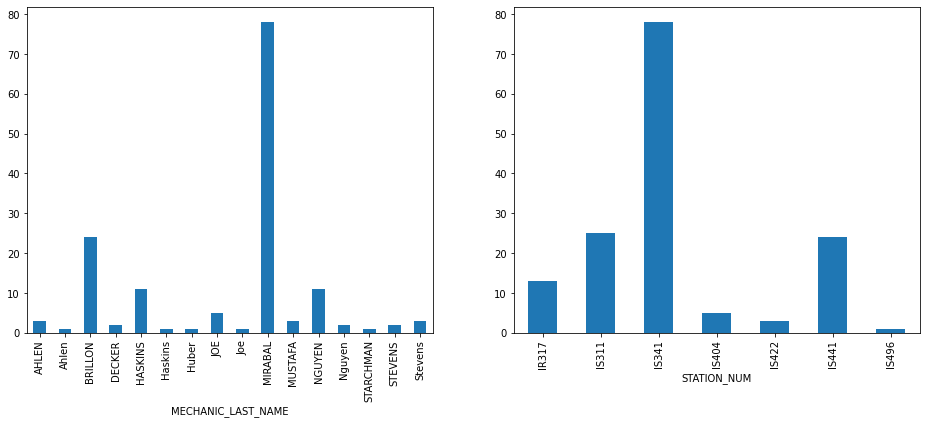

In [ ]:
#df[df.ODOMETER.astype(str).str.match('8{5,7}')].groupby('ANALYZER_NUM').size().plot.bar()
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 8888888].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 8888888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

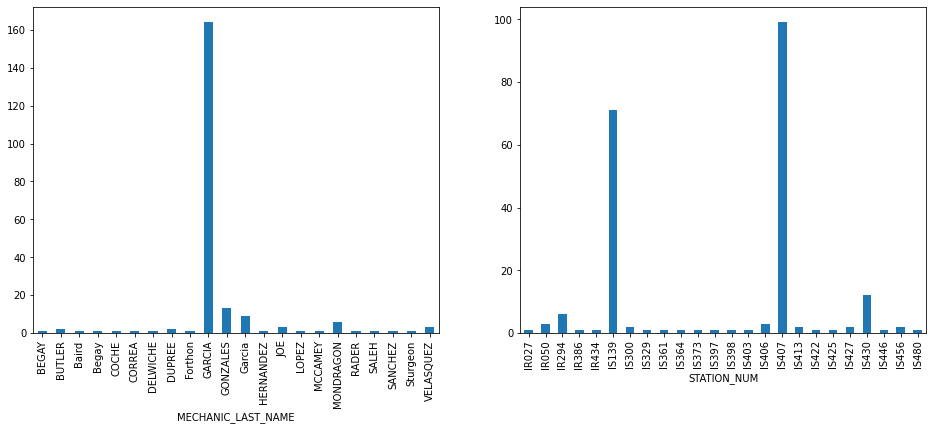

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 100000].groupby('MECHANIC_LAST_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 100000].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

##VEHICLE TYPE 
### Values: 1 - 7, 0 = missing value
GVW_TYPE, FUEL_TYPE

In [ ]:
df['VEHICLE_TYPE']

0         3
1         1
2         1
3         4
4         1
         ..
235172    4
235173    3
235174    4
235175    3
235176    3
Name: VEHICLE_TYPE, Length: 235177, dtype: int64

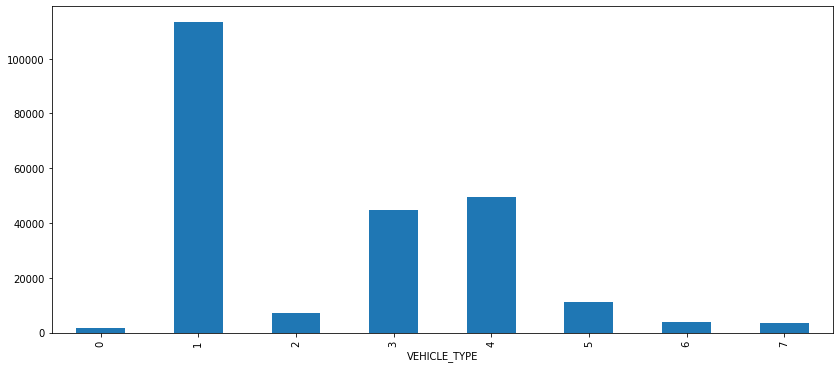

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('VEHICLE_TYPE').size().plot.bar()

In [ ]:
len(df[df.VEHICLE_TYPE.isna()])

0

In [ ]:
len(df[df.VEHICLE_TYPE == 0])

1797

In [ ]:
df.GVW_TYPE

0         1.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
235172    1.0
235173    1.0
235174    2.0
235175    1.0
235176    2.0
Name: GVW_TYPE, Length: 235177, dtype: float64

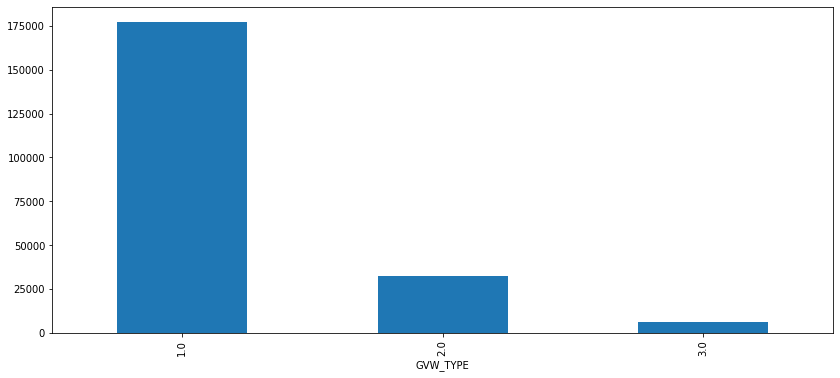

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('GVW_TYPE').size().plot.bar()

In [ ]:
len(df[df.GVW_TYPE.isna()])

19734

In [ ]:
df.GVWR

0         4222
1         2875
2         2000
3         6200
4         2625
          ... 
235172    4500
235173    4700
235174    6500
235175    3500
235176    6700
Name: GVWR, Length: 235177, dtype: int64

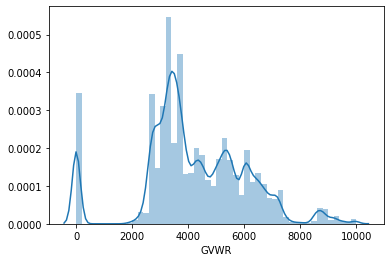

In [ ]:
sns.distplot(df.GVWR)

In [ ]:
len(df[df.GVWR == 0])

16209

In [ ]:
len(df[df.GVWR == 0 & df.GVW_TYPE.isna()])

16209

ACHTUNG some VINs have more than one GVW_TYPE!! how to deal with this??

In [ ]:
df.groupby(['VIN', 'GVW_TYPE']).size()

VIN                GVW_TYPE
0F1AC4222PB200660  1.0         1
0N8AR05SXVW181282  1.0         1
0S4BP62C377301194  1.0         1
0TDBT903371078825  1.0         1
102HX52K4XH231865  1.0         1
                              ..
ZFFXR48A5V0107658  1.0         8
ZFFYR51A3X0116639  1.0         2
ZFFYR51R9X0118072  1.0         1
ZFFYT53A310122964  1.0         2
ZHWGU12T36LA03105  1.0         2
Length: 91746, dtype: int64

In [ ]:
# gvwr_dict = df.groupby('VIN').GVWR.max().to_dict()

In [ ]:
# df['GVWR_IMP'] = df.VIN.map(gvwr_dict)#apply(lambda x: gvwr_dict[x])

In [ ]:
# len(df[df.GVWR_IMP == 0])

10219

In [ ]:
df.GVW_TYPE.fillna(0, inplace=True)

Problem: GVW_TYPE has lots of zeros. 
2. Solution: Impute zero-GVW-Type with the GVWR-value-ranges (GVW_TYPE == 1 --> GVWR range 2000-6000, GVW-TYPE == 2 --> GVWR range 6000- 9000, ..)

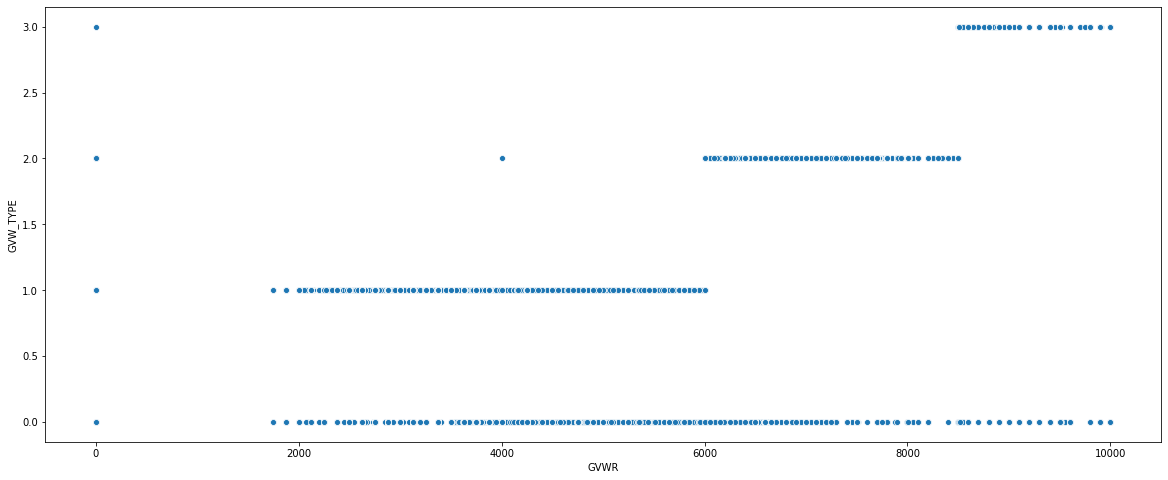

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, x='GVWR', y='GVW_TYPE', alpha=1)

IMPUTATION: replace GVW-TYPE with typical values for given weight, replace GVWR with median value for given type


In [ ]:
med_1 = df[df.GVW_TYPE == 1].GVWR.median()
med_2 = df[df.GVW_TYPE == 2].GVWR.median()
med_3 = df[df.GVW_TYPE == 3].GVWR.median()

med_1, med_2, med_3

(3625.0, 6500.0, 8800.0)

In [ ]:
def replace_gvwr(row):
  if row.GVWR == 0 and row.GVW_TYPE == 1:
    return med_1
  elif row.GVWR == 0 and row.GVW_TYPE == 2:
    return med_2
  elif row.GVWR == 0 and row.GVW_TYPE == 3:
    return med_3
  else: return row.GVWR

In [ ]:
df.sample(10).apply(lambda x: replace_gvwr(x), axis=1)

133101    3000
197587    4000
84578     6000
101414    3500
81156     2625
15232     3875
112146    5350
147103    5984
110060    3750
15116     3125
dtype: int64

In [ ]:
df['GVWR_IMP'] = df.apply(lambda x: replace_gvwr(x), axis=1)

In [ ]:
df[df.GVWR != df.GVWR_IMP][['GVWR', 'GVWR_IMP']]

,GVWR,GVWR_IMP
11,0,3625.0
18,0,3625.0
30,0,3625.0
32,0,3625.0
34,0,3625.0
...,...,...
235149,0,3625.0
235151,0,3625.0
235159,0,3625.0
235162,0,3625.0


In [ ]:
df[df.GVW_TYPE == 1].GVWR_IMP.min(), df[df.GVW_TYPE == 1].GVWR_IMP.max()

(1750.0, 6000.0)

In [ ]:
df[df.GVW_TYPE == 2].GVWR_IMP.min(), df[df.GVW_TYPE == 2].GVWR_IMP.max()

(4000.0, 8500.0)

In [ ]:
df[df.GVW_TYPE == 3].GVWR_IMP.min(), df[df.GVW_TYPE == 3].GVWR_IMP.max()

(8501.0, 10000.0)

In [ ]:
GVWR_range_1 = df[(df.GVW_TYPE == 1) & (df.GVWR > 0)].GVWR
GVWR_range_2 = df[(df.GVW_TYPE == 2) & (df.GVWR > 4000)].GVWR #there is this '4000' outlier in the GVWR variable
GVWR_range_3 = df[(df.GVW_TYPE == 3) & (df.GVWR > 0)].GVWR
print(GVWR_range_1.min(),GVWR_range_1.max())
print(GVWR_range_2.min(),GVWR_range_2.max())
print(GVWR_range_3.min(),GVWR_range_3.max())

1750 6000
6001 8500
8501 10000


In [ ]:
def replace_gvwtype(row):
  if row.GVW_TYPE == 0 and row.GVWR > 0 and row.GVWR < 6001:
    return 1
  elif row.GVW_TYPE == 0 and row.GVWR > 6000 and row.GVWR < 8501:
    return 2
  elif row.GVW_TYPE == 0 and row.GVWR > 8501:
    return 3
  else: return row.GVW_TYPE

In [ ]:
#datapoint = df[(df.GVW_TYPE == 0) & (df.GVWR > 0)].sample(random_state = 0)


In [ ]:

#replace_gvwtype(datapoint.iloc[0])


1

In [ ]:
df['GVWTYPE_IMP'] = df.apply(lambda x: replace_gvwtype(x), axis=1)

In [ ]:
df['GVWTYPE_IMP']

0         1.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
235172    1.0
235173    1.0
235174    2.0
235175    1.0
235176    2.0
Name: GVWTYPE_IMP, Length: 235177, dtype: float64

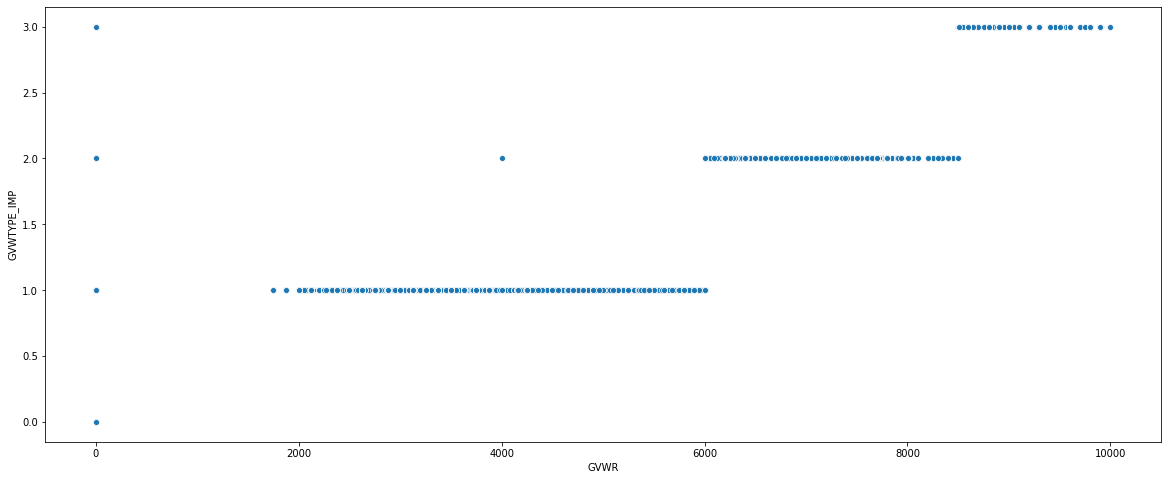

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, x='GVWR', y='GVWTYPE_IMP', alpha=1)

### FUEL TYPE

In [ ]:
len(df[df.FUEL_TYPE.isna()])

2049

In [ ]:
df.groupby('FUEL_TYPE').size()

FUEL_TYPE
B        14
D       342
G    232484
L        13
N        17
X       258
dtype: int64

## clean df without messy data for baseline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [ ]:
df['GVWTYPE_IMP']=df['GVWTYPE_IMP'].astype(int)

In [ ]:
df['RESULT'] = df['OVERALL_RESULT'].map({'F':0,'P':1})

In [ ]:
sub_df = df[(df.AGE > -1) & (df.AGE < 2000) & (~df.ODOMETER.isin([0, 88888, 888888, 8888888])) & (df.GVWTYPE_IMP != 0) & (df.OVERALL_RESULT.isin(['P','F']) & (~df.FUEL_TYPE.isna()))][['AGE','ODOMETER','GVWTYPE_IMP','FUEL_TYPE','RESULT']]

In [ ]:
sub_df.head()

,AGE,ODOMETER,GVWTYPE_IMP,RESULT
0,10,53274.0,1,1.0
1,4,109225.0,1,1.0
3,19,152121.0,2,1.0
4,7,135640.0,1,1.0
5,3,43428.0,1,1.0


In [ ]:
len(sub_df),len(df)

(209969, 235177)

In [ ]:
X , y = sub_df[['AGE', 'ODOMETER', 'GVWTYPE_IMP', 'FUEL_TYPE']],sub_df.RESULT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Do we need a StratifiedShuffleSplit? (Cannot think of a reason why we would, but maybe somebody else does..)

## baseline models

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
y_train.shape

(146978,)

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
f1_score(y_test,y_pred)

0.9488504068433131

In [ ]:
roc_auc_score(y_test,y_pred)

0.5005548918093721

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   14,  6061],
       [   68, 56848]])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

0.9493357351947759

In [ ]:
confusion_matrix(y_test,y_pred)

array([[    0,  6075],
       [    0, 56916]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.5

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [ ]:
clf.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
f1_score(y_test, y_pred)

0.9493252823138898

In [ ]:
roc_auc_score(y_test, y_pred)

0.5001382544256253

In [ ]:
confusion_matrix(y_test, y_pred)

array([[    2,  6073],
       [    3, 56913]])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
frst_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
frst_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = frst_clf.predict(X_test)

In [ ]:
roc_auc_score(y_test, y_pred)

0.5

In [ ]:
confusion_matrix(y_test, y_pred)

array([[    0,  6075],
       [    0, 56916]])